# Chapter 6  Regularization

## 6.1 Ridge

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
from numpy.random import randn
import copy

In [2]:
def ridge(x,y,lam=0): #lam = lambda
    X=copy.copy(x)
    n,p=X.shape
    X_bar=np.zeros(p)
    s=np.zeros(p)
    for j in range(p):
        X_bar[j]=np.mean(X[:,j])
    for j in range(p):
        s[j]=np.std(X[:,j])
        X[:,j]=(X[:,j]-X_bar[j])/s[j]
    y_bar=np.mean(y)
    y=y-y_bar
    beta=np.linalg.inv(X.T@X+n*lam*np.eye(p))@X.T@y
    for j in range(p):
        beta[j]=beta[j]/s[j]
    beta_0=y_bar-X_bar.T@beta
    return {'beta':beta, 'beta_0':beta_0}

In [3]:
df=np.loadtxt("crime.txt",delimiter="\t")
X=df[:,[i for i in range(2,7)]]
p=X.shape[1]
y=df[:,0]

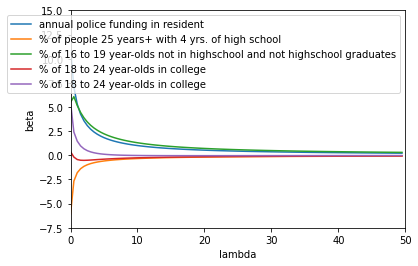

In [4]:
lambda_seq=np.arange(0,50,0.5)
plt.xlim(0,50)
plt.ylim(-7.5,15)
plt.xlabel("lambda")
plt.ylabel("beta")
labels=["annual police funding in resident","% of people 25 years+ with 4 yrs. of high school",
"% of 16 to 19 year-olds not in highschool and not highschool graduates","% of 18 to 24 year-olds in college",
"% of 18 to 24 year-olds in college"]
for j in range(p):
    coef_seq=[]
    for l in lambda_seq:
        coef_seq.append(ridge(X,y,l)['beta'][j])
    plt.plot(lambda_seq,coef_seq,label="{}".format(labels[j]))
plt.legend(loc="upper right")

## 6.2 Subderivative

Text(0.5, 1.0, 'y=x^2-3x+|x|')

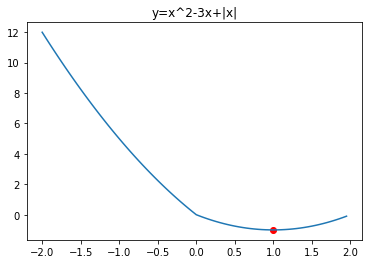

In [5]:
x_seq=np.arange(-2,2,0.05)
y=x_seq**2-3*x_seq+np.abs(x_seq)
plt.plot(x_seq,y)
plt.scatter(1,-1,c="red")
plt.title("y=x^2-3x+|x|")

Text(0.5, 1.0, 'y=x^2+x+2|x|')

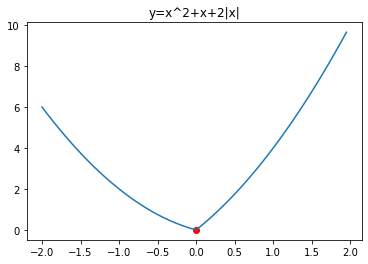

In [6]:
y=x_seq**2+x_seq+2*np.abs(x_seq)
plt.plot(x_seq,y)
plt.scatter(0,0,c="red")
plt.title("y=x^2+x+2|x|")

#### 図5.4

In [7]:
def soft_th(lam,x):
        return np.sign(x)*np.maximum(np.abs(x)-lam,0)

## 5.3 Lasso

Text(-1.5, 1, 'λ=5')

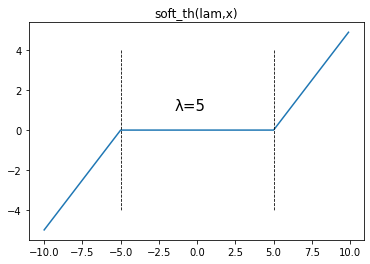

In [8]:
x_seq=np.arange(-10,10,0.1)
plt.plot(x_seq,soft_th(5,x_seq))
plt.plot([-5,-5],[4,-4],c="black",linestyle="dashed",linewidth=0.8)
plt.plot([5,5],[4,-4],c="black",linestyle="dashed",linewidth=0.8)
plt.title("soft_th(lam,x)")
plt.text( -1.5,1, 'λ=5',fontsize=15)

In [9]:
def lasso(x,y,lam=0): #lam = lambda
    X=copy.copy(x)
    n,p=X.shape
    X_bar=np.zeros(p)
    s=np.zeros(p)
    for j in range(p):
        X_bar[j]=np.mean(X[:,j])
    for j in range(p):
        s[j]=np.std(X[:,j])
        X[:,j]=(X[:,j]-X_bar[j])/s[j]
    y_bar=np.mean(y)
    y=y-y_bar
    eps=1
    beta=np.zeros(p);beta_old=np.zeros(p)
    while eps>0.001:
        for j in range(p):
            index=list(set(range(p))-{j})
            r=y-X[:,index]@beta[index]
            beta[j]=soft_th(lam,r.T@X[:,j]/n)
        eps=np.max(np.abs(beta-beta_old))
        beta_old=copy.copy(beta)
    for j in range(p):
        beta[j]=beta[j]/s[j]
    beta_0=y_bar-X_bar.T@beta
    return {'beta':beta, 'beta_0':beta_0}

In [10]:
df=np.loadtxt("crime.txt",delimiter="\t")
X=df[:,[i for i in range(2,7,1)]]
p=X.shape[1]
y=df[:,0]

Text(0.5, 1.0, ' The coefficients for each λ')

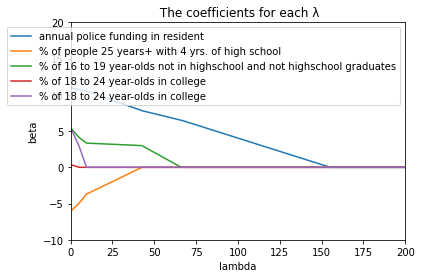

In [11]:
lambda_seq=np.arange(0,200,0.5)
plt.xlim(0,200)
plt.ylim(-10,20)
plt.xlabel("lambda")
plt.ylabel("beta")
labels=["annual police funding in resident","% of people 25 years+ with 4 yrs. of high school",
"% of 16 to 19 year-olds not in highschool and not highschool graduates","% of 18 to 24 year-olds in college",
"% of 18 to 24 year-olds in college"]
for j in range(p):
    coef_seq=[]
    for l in lambda_seq:
        coef_seq.append(lasso(X,y,l)['beta'][j])
    plt.plot(lambda_seq,coef_seq,label="{}".format(labels[j]))
plt.legend(loc="upper right")
plt.title(" The coefficients for each λ")

In [12]:
lasso(X,y,20)

{'beta': array([ 9.65900353, -2.52973842,  3.23224466,  0.        ,  0.        ]),
 'beta_0': 452.2080778769339}

## 6.4 Comparing Ridge and Lasso

## 6.5  Setting the λ values

In [13]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [14]:
Las=Lasso(alpha=20)
Las.fit(X,y)
Las.coef_

array([11.09067594, -5.2800757 ,  4.65494282,  0.55015932,  2.84324295])

In [15]:
Lcv = LassoCV(alphas=np.arange(0.1, 30, 0.1), cv=10)

In [16]:
Lcv.fit(X,y)

LassoCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,...
       22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1,
       23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2,
       24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2, 25.3,
       25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26. , 26.1, 26.2, 26.3, 26.4,
       26.5, 26.6, 26.7, 26.8, 26.9, 27. , 27.1, 27.2, 27.3, 27.4, 27.5,
       27.6, 27.7, 27.8, 27.9, 28. , 28.1, 28.2, 28.3, 28

In [17]:
Lcv.alpha_

29.900000000000002

In [18]:
Lcv.coef_

array([11.14516156, -4.87861992,  4.24780979,  0.63662582,  1.52576885])

In [19]:
Lcv.intercept_

478.4440424650896

In [20]:
df=np.loadtxt("crime.txt",delimiter="\t")
X=df[:,[i for i in range(2,7,1)]]
y=df[:,0]
# grid search for the alphas value,cv is the K
Lcv = LassoCV(alphas=np.arange(0.1, 30, 0.1), cv=10)
Lcv.fit(X,y)
Lcv.alpha_
Lcv.coef_

array([11.14516156, -4.87861992,  4.24780979,  0.63662582,  1.52576885])

In [21]:
df=np.loadtxt("crime.txt",delimiter="\t")
X=df[:,[i for i in range(2,7,1)]]
y=df[:,0]
Lcv = LassoCV(alphas=np.arange(0.1, 30, 0.1), cv=10)
Lcv.fit(X,y)
Lcv.alpha_
Lcv.coef_

array([11.14516156, -4.87861992,  4.24780979,  0.63662582,  1.52576885])

In [22]:
Las=Lasso(alpha=20)
Las.fit(X,y)
Las.coef_

array([11.09067594, -5.2800757 ,  4.65494282,  0.55015932,  2.84324295])